In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [2]:
# define parameters 

ticker = 'NFLX'
startDate = '2022-12-02'
endDate = '2022-12-03'
dataInterval = '5m'

fastSMA = 20 #9
normalSMA = 100 #50
slowSMA = 200 #200

# moving average period
rollingPeriod = 21

# entry ratio
entryPercentile = 0.10

# exit ratio
exitPercentile = 0.90

In [3]:
# get data
df = yf.download(ticker, startDate, endDate, interval = dataInterval)
df.reset_index(inplace=True)

df['Date'] = df['Datetime'].dt.date

[*********************100%***********************]  1 of 1 completed


In [4]:
# df_sample = df[df['Date']==datetime.date(2022, 12, 9)]
df_sample = df.reset_index()

In [5]:
df_sample

,index,Datetime,Open,High,Low,Close,Adj Close,Volume,Date
0,0,2022-12-09 16:00:00-05:00,320.01001,320.01001,320.01001,320.01001,320.01001,0,2022-12-09


In [6]:
min_Low = []
min_Close = []
max_High = []
max_Close = []
for i in range(1,len(df_sample)):
    min_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmin()])
    max_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmax()])
    min_Low.append(df_sample['Datetime'][df_sample[:i]['Low'].idxmin()])
    max_High.append(df_sample['Datetime'][df_sample[:i]['High'].idxmax()])

In [7]:
data = {'ticker': [ticker] * len(min_Low),
        'Date': df_sample['Datetime'][1:],
        'dataInterval': [dataInterval] * len(min_Low),
        'min_Low': min_Low,
        'min_Close': min_Close,
        'max_High': max_High,
        'max_Close': max_Close
       }
data = pd.DataFrame(data)

max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False).loc[0]['index']
min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False).loc[0]['index']
min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False).loc[0]['index']
max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False).loc[0]['index']


KeyError: 0

In [ ]:
data['max_Close'].value_counts().reset_index()

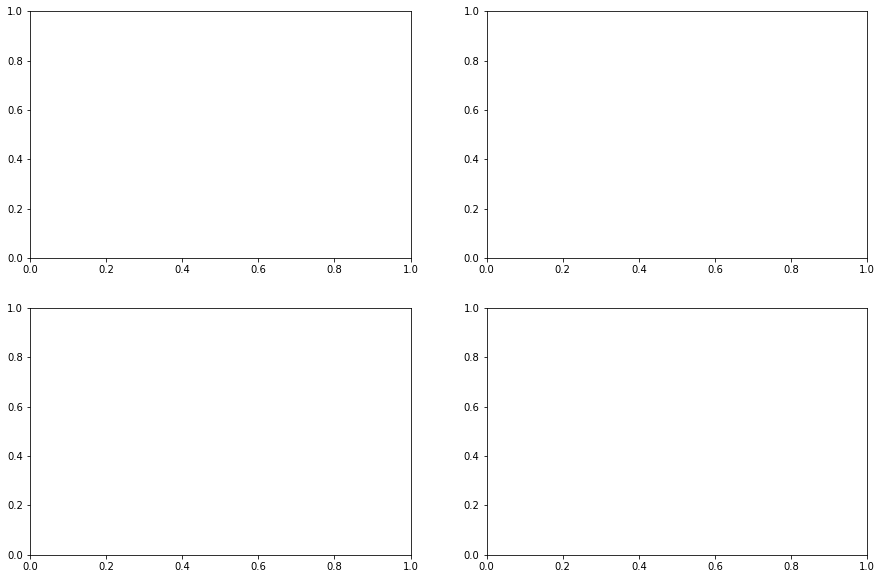

In [8]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
x = data['min_Low'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['min_Low'], label='min_Low')

plt.subplot(2,2,2)
x = data['min_Close'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['min_Close'], label='min_Close')

plt.subplot(2,2,3)
x = data['max_High'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['max_High'], label='max_High')

plt.subplot(2,2,4)
x = data['max_Close'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['max_Close'], label='max_Close')

plt.show()

In [38]:
def getDailyStats(ticker, startDate, endDate, dataInterval):
    # get data
    try:
        df = yf.download(ticker, startDate, endDate, interval = dataInterval)
        df.reset_index(inplace=True)
    except KeyError:
        pass
    
    if len(df) < 2:
        pass
    else:

        df['Date'] = df['Datetime'].dt.date
        df_sample = df.reset_index()

        min_Low = []
        min_Close = []
        max_High = []
        max_Close = []
        for i in range(1,len(df_sample)):
            min_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmin()])
            max_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmax()])
            min_Low.append(df_sample['Datetime'][df_sample[:i]['Low'].idxmin()])
            max_High.append(df_sample['Datetime'][df_sample[:i]['High'].idxmax()])


        data = {'ticker': [ticker] * len(min_Low),
            'Date': df_sample['Datetime'][1:],
            'dataInterval': [dataInterval] * len(min_Low),
            'min_Low': min_Low,
            'min_Close': min_Close,
            'max_High': max_High,
            'max_Close': max_Close
           }
        data = pd.DataFrame(data)

        max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False).loc[0]['index']
        min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False).loc[0]['index']
        min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False).loc[0]['index']
        max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False).loc[0]['index']


        data = {'ticker': ticker,
            'Date': startDate,
            'dataInterval': dataInterval,
            'min_Low': min_Low,
            'min_Close': min_Close,
            'max_High': max_High,
            'max_Close': max_Close
           }
        return data

In [39]:

tickers = [ 'AAPL',  'MSFT',  'GOOG',  'AMZN',  'TSLA',  'UNH',  'JNJ',  'V',  'XOM',  'TSM',  'NVDA',  'WMT', 
           'JPM',  'PG',  'LLY',  'MA',  'HD',  'CVX',  'META',  'PFE',  'NVO',  'NONOF',  'ABBV',  'MRK',  'KO',
            'BAC', 'PEP',  'BABAF',  'BABA',  'AVGO',  'TMO', 'MCD',  'CSCO',  'DHR',  'SHEL',  'NVS',  'TM',  'ABT',
          ]
#             'AZN',  'ORCL',  'COST',  'PROSY',  'MCD',  'CSCO',  'DHR',  'SHEL',  'NVS',  'TM',  'ABT',  'ACN',    'TMUS',  'NKE',  'DIS',  'NEE',  'BMY', 
#             'HESAF',  'HESAY',  'LIN',  'WFC',  'BHP',  'PM',  'TXN',  'VZ',  'ADBE',  'UPS',  'CMCSA',  'MS',  'CICHY',  'SCHW',  'AMGN',   
#             'RTX',  'MPNGY',    'HON',  
#             'COP',  'T',  'CIHKY',  'CVS',  'QCOM',  'IBM',  'RY',  'DE',  'CRM',  
#               'UNP',  'AAIGF',  'AAGIY',  'HDB',  'UL',  'RTNTF',  'LMT',  'PIAIF',  'SAP',  'ELV',  'SAPGF',  'LOW',  'GS',  'HSBC',  'PNGAY', 
#             'TD',  'CMWAY',  'HBCYF',   'BUDFF',  'CAT',  'BUD',  'RIO',  'SNY',  'SBUX',  'INTC',  'ACGBY',   
#             'AXP',  'PDD',  'SPGI',  'SMAWF',  'INTU',  'SIEGY',  'EQNR',  'AMD',  
#             'GILD',  'PLD',  'BA',  'ADP',  'BLK',  'DEO',  'MDT',  
#             'BP',  'CI',    'AMT',  'SONY',  'VWAGY',  'BTI',  'SYK',  'AMAT', 
#             'JDCMF',  'JD',  'CB',  'TJX',  'GE',  'ALIZF',  'C',  'ALIZY',  'ADI',  'EL',  'GLCNF',  'MMC',  'GLNCY',  'CNI',  'PYPL',  'MO',  'ESLOY',  'ESLOF',  'MKGAF',  'MKKGY',  'REGN',  'NOC',  'SBGSF',  'SBGSY',  'PCCYF',  'IDEXF',  'VRTX',  'NOW',  'IDEXY',  'IBN',  'ENB',  'VALE',  'BYDDF',  'BYDDY',  'BKNG',  'INFY',  'DUK',  'PGR',  'SO',  'GSK',  'CP',
#             'ZTS',  'EOG',  'IBDSF',  'BAM',  'IBDRY',  'MUFG',  'BDX',  'TGT',  'PBR',  'APD',  'MMM',  'WM',  'BNPQY',  'BNPQF',  'MRNA',  'GD',  
#             'HUM',  'ITW',  'PPRUY',  'HCA',  'PPRUF',  'PBCRY',  'SLB',  'BSX',  'CSX',  'USB',  'SHW',  'SFTBY',  'SFTBF',  'CL',  'NABZY',  'KDDIF',  'CME',  'FISV',  'KDDIY',  'DBSDY',  'AON',  'DBSDF',  'ETN',  'FRCOY',  'BMO',  'EQIX',  'WMMVY',  'WMMVF',
#             'PNC',  'DSNKY',   'CCI',  'CNQ',   'ABNB',  'BNS',  'MU', 'CHTR',    'SMMNY',  'ATVI',   'ABB',  'VCISY',  'ABLZF',  'UBS',  'AMX',  'ICE',  'BX',  'AMOV',  'OXY',  'CSUAY',  'MET',  'NSC',  'PSTVY',  'TFC',  
#             'EMR',  'ATLCY',    'FCX',  'TRI',  'ENLAY',   'RELX',  'BAYRY',  'BAYZF',  'DG',  'RLXXF',  'GM', 
#             'KDP',  'F',  'UBER',  'MCO',  'MCK',  'SAFRF',  'SAFRY',  'PSA',  'MNST',  'NGLOY',  'EPD',  'TOELY',  'AAUKF',  'TOELF',  'ORLY',  'RBGLY',  'VMW',  'SOBKY',  'RBGPF',  'MAR',  'GIS',  'PXD',  'SRE',  'SHECY',  'ADM',  'SHECF',  'LDNXF',  'SFBQF',  'LNSTY',  'PRNDY',  'RCRRF',  'PDRDF',  'MPC',  'RCRUY',  'SNPS',  'AEP',  'E', 
#             'KHC',  'SAN',  'NTDOF',  'DPSGY',  'CNC',  'SHOP',   'D',  'HSY',  'DPSTF',  'NTDOY',  'MSBHF',  'HTHIF',  'ECIFY',  'PANW',  'ANZBY',  'DASTF',  
#             'DASTY',  'OLCLY',  'TAK',   'SNOW',  'AIG',  'STLA',  'PSX',    'AZO',  'NTES',  'CTAS',  'KMB',  'ABEV',  'BASFY',  'ANCTF',  'ITOCY',  'EW',  'ROP',  'ADYEY',  'HNHPF',  'NGG',
#             'JCI',  'A',  'MELI',  'CTVA',  'DXCM',  'CDNS',  'ITUB',  'FDX',  'STZ', 
#             'MSI',  'VLO',  'MQBKY',  'NXPI',  
#             'WDS',  'ING',  'WDAY',  'CILJF',  'TRV',  'AFL',  'CHGCY',  'ENPH',  'UNVGY',  'PAYX',  'RSG',  'ECL',  'UMGNF',  'IFNNY',  'IFNNF',  'BCE',  'CMG',  'TRP',  'ADSK',  'BAIDF',  'MCHP',  'FIS',  'SYY',  'LULU',  'BIDU', 
#             'KKR',  'BNTX',   'EXC',   'BIIB',  'LHX',  'TKOMY',  'FTNT',  'OVCHY',  'TKOMF',  'HMC',  'BDWBY',  'AJG',  'O',  'TT',  'RACE',  'NTR']

startDate = ['2022-10-31','2022-11-01','2022-11-02','2022-11-03','2022-11-04',
            '2022-11-07','2022-11-08','2022-11-09','2022-11-10','2022-11-11',
             '2022-11-14','2022-11-15','2022-11-16','2022-11-17','2022-11-18',
             '2022-11-28','2022-11-29','2022-11-30','2022-12-01','2022-12-02',
             '2022-12-05','2022-12-06', '2022-12-07','2022-12-08','2022-12-09', 
             '2023-12-31']

dataInterval = '5m'

query = []
for i in range(len(startDate)-1):
    data = {'ticker': tickers ,
            'startDate': startDate[i],
            'endDate': startDate[i+1]  ,
            'dataInterval': [dataInterval] * len(tickers)
        }
    query.append(pd.DataFrame(data))
query = pd.concat(query)
query.reset_index(inplace=True)

In [40]:
output = []
for i in range(0, len(query)):
    print(query['ticker'][i],query['startDate'][i], query['endDate'][i],i, 'out of',len(query))
    
    output.append(getDailyStats(query['ticker'][i],
                                  query['startDate'][i],
                                  query['endDate'][i],
                                  query['dataInterval'][i]))
    


AAPL 2022-10-31 2022-11-01 0 out of 800
[*********************100%***********************]  1 of 1 completed
MSFT 2022-10-31 2022-11-01 1 out of 800
[*********************100%***********************]  1 of 1 completed
GOOG 2022-10-31 2022-11-01 2 out of 800
[*********************100%***********************]  1 of 1 completed
GOOGL 2022-10-31 2022-11-01 3 out of 800
[*********************100%***********************]  1 of 1 completed
AMZN 2022-10-31 2022-11-01 4 out of 800
[*********************100%***********************]  1 of 1 completed
TSLA 2022-10-31 2022-11-01 5 out of 800
[*********************100%***********************]  1 of 1 completed
UNH 2022-10-31 2022-11-01 6 out of 800
[*********************100%***********************]  1 of 1 completed
JNJ 2022-10-31 2022-11-01 7 out of 800
[*********************100%***********************]  1 of 1 completed
V 2022-10-31 2022-11-01 8 out of 800
[*********************100%***********************]  1 of 1 completed
XOM 2022-10-31 2022-11-

[*********************100%***********************]  1 of 1 completed
WMT 2022-11-02 2022-11-03 76 out of 800
[*********************100%***********************]  1 of 1 completed
JPM 2022-11-02 2022-11-03 77 out of 800
[*********************100%***********************]  1 of 1 completed
PG 2022-11-02 2022-11-03 78 out of 800
[*********************100%***********************]  1 of 1 completed
LLY 2022-11-02 2022-11-03 79 out of 800
[*********************100%***********************]  1 of 1 completed
MA 2022-11-02 2022-11-03 80 out of 800
[*********************100%***********************]  1 of 1 completed
HD 2022-11-02 2022-11-03 81 out of 800
[*********************100%***********************]  1 of 1 completed
CVX 2022-11-02 2022-11-03 82 out of 800
[*********************100%***********************]  1 of 1 completed
META 2022-11-02 2022-11-03 83 out of 800
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 2022-11-03 84 out of 800
[********************

[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 2022-11-07 150 out of 800
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-04 2022-11-07 151 out of 800
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-04 2022-11-07 152 out of 800
[*********************100%***********************]  1 of 1 completed
KO 2022-11-04 2022-11-07 153 out of 800
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-04 2022-11-07 154 out of 800
[*********************100%***********************]  1 of 1 completed
PEP 2022-11-04 2022-11-07 155 out of 800
[*********************100%***********************]  1 of 1 completed
BABAF 2022-11-04 2022-11-07 156 out of 800
[*********************100%***********************]  1 of 1 completed
BABA 2022-11-04 2022-11-07 157 out of 800
[*********************100%***********************]  1 of 1 completed
AVGO 2022-11-04 2022-11-07 158 out of 800
[***

[*********************100%***********************]  1 of 1 completed
AAPL 2022-11-09 2022-11-10 224 out of 800
[*********************100%***********************]  1 of 1 completed
MSFT 2022-11-09 2022-11-10 225 out of 800
[*********************100%***********************]  1 of 1 completed
GOOG 2022-11-09 2022-11-10 226 out of 800
[*********************100%***********************]  1 of 1 completed
GOOGL 2022-11-09 2022-11-10 227 out of 800
[*********************100%***********************]  1 of 1 completed
AMZN 2022-11-09 2022-11-10 228 out of 800
[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-09 2022-11-10 229 out of 800
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-09 2022-11-10 230 out of 800
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 2022-11-10 231 out of 800
[*********************100%***********************]  1 of 1 completed
V 2022-11-09 2022-11-10 232 out of 800
[****

[*********************100%***********************]  1 of 1 completed
TSM 2022-11-11 2022-11-14 298 out of 800
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-11 2022-11-14 299 out of 800
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-11 2022-11-14 300 out of 800
[*********************100%***********************]  1 of 1 completed
JPM 2022-11-11 2022-11-14 301 out of 800
[*********************100%***********************]  1 of 1 completed
PG 2022-11-11 2022-11-14 302 out of 800
[*********************100%***********************]  1 of 1 completed
LLY 2022-11-11 2022-11-14 303 out of 800
[*********************100%***********************]  1 of 1 completed
MA 2022-11-11 2022-11-14 304 out of 800
[*********************100%***********************]  1 of 1 completed
HD 2022-11-11 2022-11-14 305 out of 800
[*********************100%***********************]  1 of 1 completed
CVX 2022-11-11 2022-11-14 306 out of 800
[***********

[*********************100%***********************]  1 of 1 completed
PFE 2022-11-15 2022-11-16 372 out of 800
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-15 2022-11-16 373 out of 800
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-15 2022-11-16 374 out of 800
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-15 2022-11-16 375 out of 800
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-15 2022-11-16 376 out of 800
[*********************100%***********************]  1 of 1 completed
KO 2022-11-15 2022-11-16 377 out of 800
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-15 2022-11-16 378 out of 800
[*********************100%***********************]  1 of 1 completed
PEP 2022-11-15 2022-11-16 379 out of 800
[*********************100%***********************]  1 of 1 completed
BABAF 2022-11-15 2022-11-16 380 out of 800
[*****

[*********************100%***********************]  1 of 1 completed
AVGO 2022-11-17 2022-11-18 446 out of 800
[*********************100%***********************]  1 of 1 completed
TMO 2022-11-17 2022-11-18 447 out of 800
[*********************100%***********************]  1 of 1 completed
AAPL 2022-11-18 2022-11-28 448 out of 800
[*********************100%***********************]  1 of 1 completed
MSFT 2022-11-18 2022-11-28 449 out of 800
[*********************100%***********************]  1 of 1 completed
GOOG 2022-11-18 2022-11-28 450 out of 800
[*********************100%***********************]  1 of 1 completed
GOOGL 2022-11-18 2022-11-28 451 out of 800
[*********************100%***********************]  1 of 1 completed
AMZN 2022-11-18 2022-11-28 452 out of 800
[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-18 2022-11-28 453 out of 800
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-18 2022-11-28 454 out of 800
[*

[*********************100%***********************]  1 of 1 completed
V 2022-11-29 2022-11-30 520 out of 800
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-29 2022-11-30 521 out of 800
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-29 2022-11-30 522 out of 800
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-29 2022-11-30 523 out of 800
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-29 2022-11-30 524 out of 800
[*********************100%***********************]  1 of 1 completed
JPM 2022-11-29 2022-11-30 525 out of 800
[*********************100%***********************]  1 of 1 completed
PG 2022-11-29 2022-11-30 526 out of 800
[*********************100%***********************]  1 of 1 completed
LLY 2022-11-29 2022-11-30 527 out of 800
[*********************100%***********************]  1 of 1 completed
MA 2022-11-29 2022-11-30 528 out of 800
[************

[*********************100%***********************]  1 of 1 completed
CVX 2022-12-01 2022-12-02 594 out of 800
[*********************100%***********************]  1 of 1 completed
META 2022-12-01 2022-12-02 595 out of 800
[*********************100%***********************]  1 of 1 completed
PFE 2022-12-01 2022-12-02 596 out of 800
[*********************100%***********************]  1 of 1 completed
NVO 2022-12-01 2022-12-02 597 out of 800
[*********************100%***********************]  1 of 1 completed
NONOF 2022-12-01 2022-12-02 598 out of 800
[*********************100%***********************]  1 of 1 completed
ABBV 2022-12-01 2022-12-02 599 out of 800
[*********************100%***********************]  1 of 1 completed
MRK 2022-12-01 2022-12-02 600 out of 800
[*********************100%***********************]  1 of 1 completed
KO 2022-12-01 2022-12-02 601 out of 800
[*********************100%***********************]  1 of 1 completed
BAC 2022-12-01 2022-12-02 602 out of 800
[******

[*********************100%***********************]  1 of 1 completed
BABAF 2022-12-05 2022-12-06 668 out of 800
[*********************100%***********************]  1 of 1 completed
BABA 2022-12-05 2022-12-06 669 out of 800
[*********************100%***********************]  1 of 1 completed
AVGO 2022-12-05 2022-12-06 670 out of 800
[*********************100%***********************]  1 of 1 completed
TMO 2022-12-05 2022-12-06 671 out of 800
[*********************100%***********************]  1 of 1 completed
AAPL 2022-12-06 2022-12-07 672 out of 800
[*********************100%***********************]  1 of 1 completed
MSFT 2022-12-06 2022-12-07 673 out of 800
[*********************100%***********************]  1 of 1 completed
GOOG 2022-12-06 2022-12-07 674 out of 800
[*********************100%***********************]  1 of 1 completed
GOOGL 2022-12-06 2022-12-07 675 out of 800
[*********************100%***********************]  1 of 1 completed
AMZN 2022-12-06 2022-12-07 676 out of 800


[*********************100%***********************]  1 of 1 completed
UNH 2022-12-08 2022-12-09 742 out of 800
[*********************100%***********************]  1 of 1 completed
JNJ 2022-12-08 2022-12-09 743 out of 800
[*********************100%***********************]  1 of 1 completed
V 2022-12-08 2022-12-09 744 out of 800
[*********************100%***********************]  1 of 1 completed
XOM 2022-12-08 2022-12-09 745 out of 800
[*********************100%***********************]  1 of 1 completed
TSM 2022-12-08 2022-12-09 746 out of 800
[*********************100%***********************]  1 of 1 completed
NVDA 2022-12-08 2022-12-09 747 out of 800
[*********************100%***********************]  1 of 1 completed
WMT 2022-12-08 2022-12-09 748 out of 800
[*********************100%***********************]  1 of 1 completed
JPM 2022-12-08 2022-12-09 749 out of 800
[*********************100%***********************]  1 of 1 completed
PG 2022-12-08 2022-12-09 750 out of 800
[***********

In [41]:
data = pd.DataFrame(output)
data['min_Low_hour'] = pd.to_datetime(data['min_Low']).dt.strftime('%H:%M:%S')
data['max_High_hour'] = pd.to_datetime(data['max_High']).dt.strftime('%H:%M:%S')
data['min_Close_hour'] = pd.to_datetime(data['min_Close']).dt.strftime('%H:%M:%S')
data['max_Close_hour'] = pd.to_datetime(data['max_Close']).dt.strftime('%H:%M:%S')


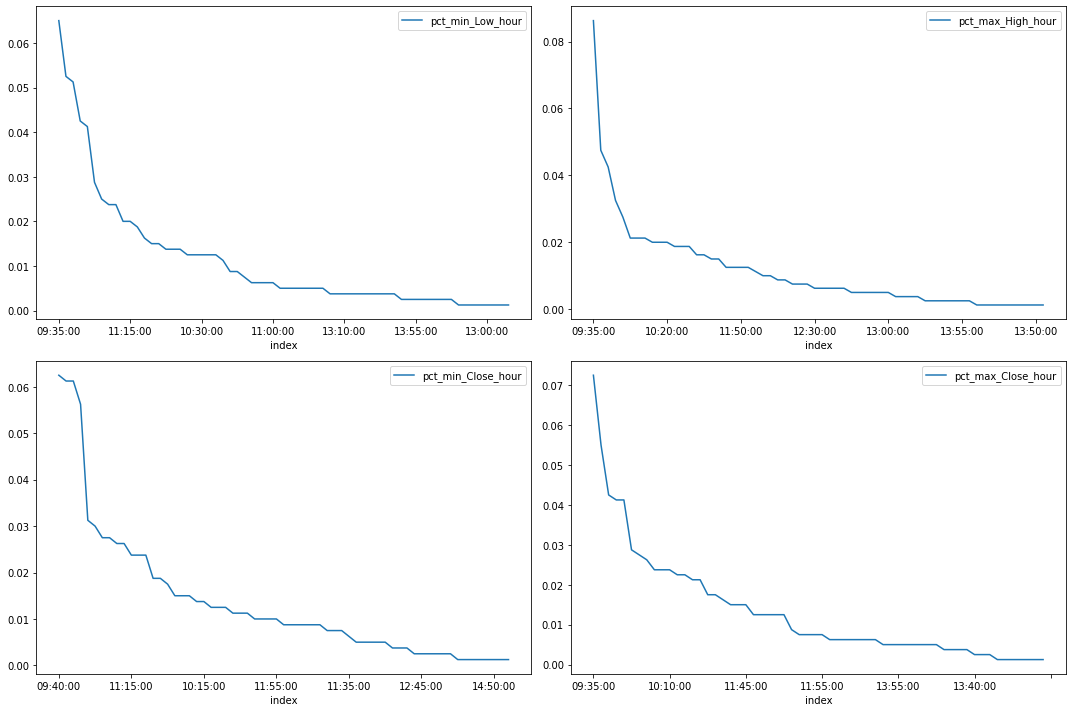

In [49]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

min_Low_hour = data['min_Low_hour'].value_counts().reset_index()
min_Low_hour['pct_min_Low_hour'] = min_Low_hour['min_Low_hour'] / min_Low_hour['min_Low_hour'].sum()
min_Low_hour['cum_min_Low_hour'] = min_Low_hour['pct_min_Low_hour'].cumsum()
#min_Low_hour.plot('index','cum_min_Low_hour', ax=axes[0,0])
min_Low_hour[1:].plot('index','pct_min_Low_hour', ax=axes[0,0])


max_High_hour = data['max_High_hour'].value_counts().reset_index()
max_High_hour['pct_max_High_hour'] = max_High_hour['max_High_hour'] / max_High_hour['max_High_hour'].sum()
max_High_hour['cum_max_High_hour'] = max_High_hour['pct_max_High_hour'].cumsum()
#max_High_hour.plot('index','cum_max_High_hour', ax=axes[0,1])
max_High_hour[1:].plot('index','pct_max_High_hour', ax=axes[0,1])


min_Close_hour = data['min_Close_hour'].value_counts().reset_index()
min_Close_hour['pct_min_Close_hour'] = min_Close_hour['min_Close_hour'] / min_Close_hour['min_Close_hour'].sum()
min_Close_hour['cum_min_Close_hour'] = min_Close_hour['pct_min_Close_hour'].cumsum()
#min_Close_hour.plot('index','cum_min_Close_hour', ax=axes[1,0])
min_Close_hour[1:].plot('index','pct_min_Close_hour', ax=axes[1,0])


max_Close_hour = data['max_Close_hour'].value_counts().reset_index()
max_Close_hour['pct_max_Close_hour'] = max_Close_hour['max_Close_hour'] / max_Close_hour['max_Close_hour'].sum()
max_Close_hour['cum_max_Close_hour'] = max_Close_hour['pct_max_Close_hour'].cumsum()
#max_Close_hour.plot('index','cum_max_Close_hour', ax=axes[1,1])
max_Close_hour[1:].plot('index','pct_max_Close_hour', ax=axes[1,1])


plt.tight_layout()
plt.show()

In [47]:
min_Low_hour.head()

,index,min_Low_hour,pct_min_Low_hour,cum_min_Low_hour
0,09:30:00,219,0.27375,0.27375
1,09:35:00,52,0.06500,0.33875
2,09:45:00,42,0.05250,0.39125
3,09:40:00,41,0.05125,0.44250
4,10:00:00,34,0.04250,0.48500


In [48]:
max_High_hour.head()


,index,max_High_hour,pct_max_High_hour,cum_max_High_hour
0,09:30:00,235,0.29375,0.29375
1,09:35:00,69,0.08625,0.38000
2,09:45:00,38,0.04750,0.42750
3,09:40:00,34,0.04250,0.47000
4,09:50:00,26,0.03250,0.50250


In [53]:
AAPL = data[data['ticker']=='AAPL']
AAPL

,ticker,Date,dataInterval,min_Low,min_Close,max_High,max_Close,min_Low_hour,max_High_hour,min_Close_hour,max_Close_hour
0,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
32,AAPL,2022-11-01,5m,2022-11-01 11:40:00-04:00,2022-11-01 11:40:00-04:00,2022-11-01 09:30:00-04:00,2022-11-01 09:30:00-04:00,11:40:00,09:30:00,11:40:00,09:30:00
64,AAPL,2022-11-02,5m,2022-11-02 12:35:00-04:00,2022-11-02 12:35:00-04:00,2022-11-02 09:30:00-04:00,2022-11-02 09:35:00-04:00,12:35:00,09:30:00,12:35:00,09:35:00
96,AAPL,2022-11-03,5m,2022-11-03 11:55:00-04:00,2022-11-03 11:50:00-04:00,2022-11-03 09:30:00-04:00,2022-11-03 09:30:00-04:00,11:55:00,09:30:00,11:50:00,09:30:00
128,AAPL,2022-11-04,5m,2022-11-04 14:05:00-04:00,2022-11-04 13:05:00-04:00,2022-11-04 09:30:00-04:00,2022-11-04 09:30:00-04:00,14:05:00,09:30:00,13:05:00,09:30:00
160,AAPL,2022-11-07,5m,2022-11-07 09:50:00-05:00,2022-11-07 09:45:00-05:00,2022-11-07 09:30:00-05:00,2022-11-07 11:35:00-05:00,09:50:00,09:30:00,09:45:00,11:35:00
192,AAPL,2022-11-08,5m,2022-11-08 10:10:00-05:00,2022-11-08 10:10:00-05:00,2022-11-08 13:10:00-05:00,2022-11-08 13:05:00-05:00,10:10:00,13:10:00,10:10:00,13:05:00
224,AAPL,2022-11-09,5m,2022-11-09 10:55:00-05:00,2022-11-09 12:25:00-05:00,2022-11-09 09:30:00-05:00,2022-11-09 09:30:00-05:00,10:55:00,09:30:00,12:25:00,09:30:00
256,AAPL,2022-11-10,5m,2022-11-10 09:40:00-05:00,2022-11-10 09:40:00-05:00,2022-11-10 10:20:00-05:00,2022-11-10 10:20:00-05:00,09:40:00,10:20:00,09:40:00,10:20:00
288,AAPL,2022-11-11,5m,2022-11-11 09:30:00-05:00,2022-11-11 09:30:00-05:00,2022-11-11 11:05:00-05:00,2022-11-11 11:00:00-05:00,09:30:00,11:05:00,09:30:00,11:00:00


In [55]:
x = [1,2,3]
y = [4,5,6]
[a*b for a,b in zip(x,y)]

[4, 10, 18]